In [4]:
import pyomo.environ as pyo
import pyomo.gdp as gdp
import numpy as np
import pandas as pd
import math 
import os, sys
from scipy.stats import multivariate_normal

from matplotlib import pyplot as plt
import matplotlib.patches as patches
%matplotlib inline
plt.rcParams["figure.figsize"] = (15,7)
from enum import Enum

CURRENT_DIR = os.path.dirname(os.path.abspath("rare_pattern_detect"))
sys.path.append(os.path.dirname(CURRENT_DIR))

from rare_pattern_detect.patterns import PatternSpace, PatternSpaceType, MIN_AREA
from rare_pattern_detect.minlp_based import minlp_has_rare_pattern
from rare_pattern_detect.rare_pattern_detect import RarePatternDetect
from rare_pattern_detect.pattern_space_utils import draw_largest_bounding_area, draw2dpattern

# Notes: 
    - FIXME: Problem f_hat is zero eventhough point is inside the pattern 
    - ERROR: Unable to clone Pyomo component attribute. Component
        'interval_constraint_index' contains an uncopyable field '_init_dimen'
        (<class 'pyomo.core.base.initializer.ConstantInitializer'>).  Setting
        field to `None` on new object
    - Using only two features we get different values for f_hat. However when using more (3 features) most of the f_hat values are equal to zero
# TODO:
    - Run the minlp solver on the cardio dataset and evaluate the performance using metrics
        - Calculate the false positive and false negative rate for the AUROC curve
        - Create AUROC curve using the variable (U_min, delta, epsilon, range for tau (should be relative to the value of f_hat)) -> single curve 
        - Repeat this for different U_min and plot all the auroc curves in one plot
    - Compare performance to SVM, RF using the metrics for supervised learning
    - Create a single 3D test (cube)


In [5]:
# MIN_AREA = 0.3 # 0.3

In [6]:
# # cmap = plt.get_cmap('viridis')

# # training_set =  np.array(
# #     [[0.0, 0.0], [2.0, 0.0], [0.0, 2.0], [2.0, 2.0]]
# # )
training_set = multivariate_normal.rvs(size=(100,2))
# # point_to_be_classified = np.array([[0.25,0.25]])
testing_set = multivariate_normal.rvs(size=(10,2))

# # os.listdir('../ADbench-main/datasets/Classical')
# # b = np.load('../ADbench-main/datasets/Classical/6_cardio.npz')
# # b.keys()
# # print(b.files)

# with np.load('../ADBench-main/datasets/Classical/6_cardio.npz') as data:
#     X = data['X']
#     y = data['y']
#     idx = np.random.permutation(len(X))
#     X,y = X[idx], y[idx]

# #  number of points is 1831
# print("number of datapoints is: ",len(y))

# # number of feature per data point is 21
# print("number of feature per data point is: ", len(X[0]))


# TRAINING_LIMIT = 200
# TESTING_LIMIT = 10
# FEATURES = 2

# X = X[:TRAINING_LIMIT+TESTING_LIMIT,:FEATURES]
# y = y[:TRAINING_LIMIT+TESTING_LIMIT]

# training_set = X[:TRAINING_LIMIT]
# training_labels = y[:TRAINING_LIMIT]

# testing_set = X[TRAINING_LIMIT:-1]
# testing_labels = y[TRAINING_LIMIT:-1]

---------------------------------------------------------------------------------------------
              Mixed-Integer Nonlinear Decomposition Toolbox in Pyomo (MindtPy)               
---------------------------------------------------------------------------------------------
For more information, please visit https://pyomo.readthedocs.io/en/stable/contributed_packages/mindtpy.html
Original model has 911 constraints (1 nonlinear) and 0 disjunctions, with 506 variables, of which 500 are binary, 0 are integer, and 6 are continuous.
Objective is nonlinear. Moving it to constraint set.


min_area:  63.0
N=100 , d=2, vc=4
------- itr: 0 -------
cutoff (min_area):  63.0
point:  [-2.14357230e-04  2.43969751e+00]
training set:  [[-2.14357230e-04  2.43969751e+00]
 [-1.07217896e+00  5.90202754e-02]
 [ 1.26731972e+00 -9.83971432e-01]
 [-2.05588770e-01  1.60412428e-01]
 [-1.24921945e+00  4.79876684e-01]
 [ 1.70761163e+00  5.94860195e-02]
 [ 6.93447583e-01  1.11773628e+00]
 [-1.46292547e-01  3.90388890e-01]
 [ 9.99426320e-01  4.19635901e-02]
 [-1.29003178e+00  1.45090959e-01]
 [-2.97085602e-01  1.39393435e+00]
 [ 1.21913304e+00 -5.93983436e-03]
 [ 4.69964711e-01 -5.82007038e-01]
 [ 1.62825446e-01 -1.16574777e-01]
 [-1.43436589e+00  4.12339454e-01]
 [-6.16657584e-01  2.76254102e-01]
 [ 8.14641191e-01 -4.25425350e-01]
 [ 9.18796046e-01 -1.33151723e+00]
 [ 1.52010636e+00  1.06691479e-02]
 [-1.17347869e+00 -2.13829776e-01]
 [ 7.20887869e-01  5.79039092e-01]
 [ 9.31463007e-01  1.99193265e+00]
 [ 2.56797363e-01  1.14246516e+00]
 [-5.51999558e-01 -2.20166419e-01]
 [ 9.47354313e-01 -1.

rNLP is the initial strategy being used.

 Iteration | Subproblem Type | Objective Value | Primal Bound |   Dual Bound |   Gap   | Time(s)

         -       Relaxed NLP       1.96697e-07            inf    1.96697e-07      nan%      0.49


    functionality.  (deprecated in 6.4.2) (called from
    /Users/p392827/Desktop/PDG/porsche-research/pac-learning/pac-
    venv/lib/python3.9/site-
    packages/pyomo/contrib/mindtpy/initialization.py:154)


         1              MILP       1.79208e-07            inf    1.96697e-07      nan%      0.95
*        1         Fixed NLP       -7.4941e-09    -7.4941e-09    1.96697e-07   -2688.81%      1.21
MindtPy exiting on bound convergence. Absolute gap: -2.0419068818206082e-07 <= absolute tolerance: 0.0001 

 Primal integral          :    0.0000 
 Dual integral            :    0.0000 
 Primal-dual gap integral :    0.0000 


evaluating: [-2.14357230e-04  2.43969751e+00] -> f_hat:0.0 <?> mu:0.1
Classification result:  True
area_calculated_pattern:  1.095943707142246


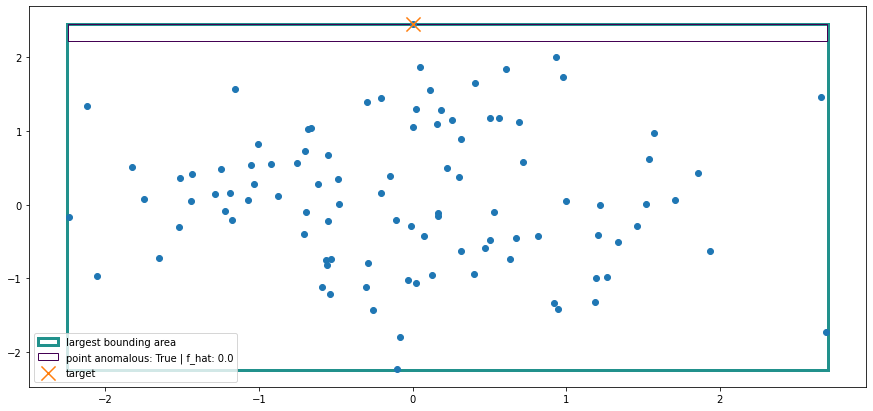

---------------------------------------------------------------------------------------------
              Mixed-Integer Nonlinear Decomposition Toolbox in Pyomo (MindtPy)               
---------------------------------------------------------------------------------------------
For more information, please visit https://pyomo.readthedocs.io/en/stable/contributed_packages/mindtpy.html
Original model has 911 constraints (1 nonlinear) and 0 disjunctions, with 506 variables, of which 500 are binary, 0 are integer, and 6 are continuous.
Objective is nonlinear. Moving it to constraint set.
rNLP is the initial strategy being used.

 Iteration | Subproblem Type | Objective Value | Primal Bound |   Dual Bound |   Gap   | Time(s)



------- itr: 1 -------
cutoff (min_area):  63.0
point:  [-1.07217896  0.05902028]
training set:  [[-2.14357230e-04  2.43969751e+00]
 [-1.07217896e+00  5.90202754e-02]
 [ 1.26731972e+00 -9.83971432e-01]
 [-2.05588770e-01  1.60412428e-01]
 [-1.24921945e+00  4.79876684e-01]
 [ 1.70761163e+00  5.94860195e-02]
 [ 6.93447583e-01  1.11773628e+00]
 [-1.46292547e-01  3.90388890e-01]
 [ 9.99426320e-01  4.19635901e-02]
 [-1.29003178e+00  1.45090959e-01]
 [-2.97085602e-01  1.39393435e+00]
 [ 1.21913304e+00 -5.93983436e-03]
 [ 4.69964711e-01 -5.82007038e-01]
 [ 1.62825446e-01 -1.16574777e-01]
 [-1.43436589e+00  4.12339454e-01]
 [-6.16657584e-01  2.76254102e-01]
 [ 8.14641191e-01 -4.25425350e-01]
 [ 9.18796046e-01 -1.33151723e+00]
 [ 1.52010636e+00  1.06691479e-02]
 [-1.17347869e+00 -2.13829776e-01]
 [ 7.20887869e-01  5.79039092e-01]
 [ 9.31463007e-01  1.99193265e+00]
 [ 2.56797363e-01  1.14246516e+00]
 [-5.51999558e-01 -2.20166419e-01]
 [ 9.47354313e-01 -1.41172492e+00]
 [ 7.60430129e-02 -4.3112281

         -       Relaxed NLP        3.5401e-08            inf     3.5401e-08      nan%      0.44
         1              MILP       7.07528e-08            inf    7.07528e-08      nan%      0.58
NLP subproblem was locally infeasible.
Solving feasibility problem


ERROR: Unable to clone Pyomo component attribute. Component
    'MindtPy_utils.cuts.feasible_no_good_cuts_index' contains an uncopyable
    field '_init_dimen' (<class
    'pyomo.core.base.initializer.ConstantInitializer'>).  Setting field to
    `None` on new object


         2              MILP       4.28033e-08            inf    7.07528e-08      nan%      1.40
NLP subproblem was locally infeasible.
Solving feasibility problem
         3              MILP       6.37602e-08            inf    7.07528e-08      nan%      2.29
NLP subproblem was locally infeasible.
Solving feasibility problem
         4              MILP        6.2171e-08            inf    7.07528e-08      nan%      3.30
*        4         Fixed NLP       -7.4941e-09    -7.4941e-09    7.07528e-08   -1030.36%      3.58
MindtPy exiting on bound convergence. Absolute gap: -7.824685625039917e-08 <= absolute tolerance: 0.0001 

 Primal integral          :    0.0000 
 Dual integral            :    0.0000 
 Primal-dual gap integral :    0.0000 


evaluating: [-1.07217896  0.05902028] -> f_hat:0.0 <?> mu:0.1
Classification result:  True
area_calculated_pattern:  1.0070363714002857


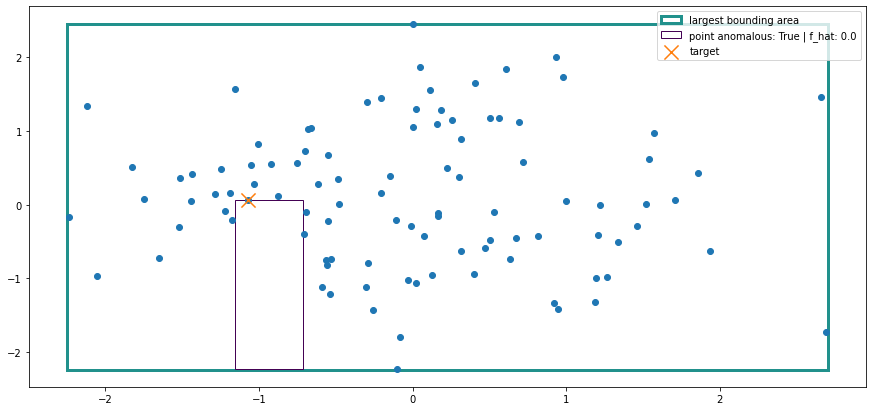

------- itr: 2 -------
cutoff (min_area):  63.0
point:  [ 1.26731972 -0.98397143]
training set:  [[-2.14357230e-04  2.43969751e+00]
 [-1.07217896e+00  5.90202754e-02]
 [ 1.26731972e+00 -9.83971432e-01]
 [-2.05588770e-01  1.60412428e-01]
 [-1.24921945e+00  4.79876684e-01]
 [ 1.70761163e+00  5.94860195e-02]
 [ 6.93447583e-01  1.11773628e+00]
 [-1.46292547e-01  3.90388890e-01]
 [ 9.99426320e-01  4.19635901e-02]
 [-1.29003178e+00  1.45090959e-01]
 [-2.97085602e-01  1.39393435e+00]
 [ 1.21913304e+00 -5.93983436e-03]
 [ 4.69964711e-01 -5.82007038e-01]
 [ 1.62825446e-01 -1.16574777e-01]
 [-1.43436589e+00  4.12339454e-01]
 [-6.16657584e-01  2.76254102e-01]
 [ 8.14641191e-01 -4.25425350e-01]
 [ 9.18796046e-01 -1.33151723e+00]
 [ 1.52010636e+00  1.06691479e-02]
 [-1.17347869e+00 -2.13829776e-01]
 [ 7.20887869e-01  5.79039092e-01]
 [ 9.31463007e-01  1.99193265e+00]
 [ 2.56797363e-01  1.14246516e+00]
 [-5.51999558e-01 -2.20166419e-01]
 [ 9.47354313e-01 -1.41172492e+00]
 [ 7.60430129e-02 -4.3112281

---------------------------------------------------------------------------------------------
              Mixed-Integer Nonlinear Decomposition Toolbox in Pyomo (MindtPy)               
---------------------------------------------------------------------------------------------
For more information, please visit https://pyomo.readthedocs.io/en/stable/contributed_packages/mindtpy.html
Original model has 911 constraints (1 nonlinear) and 0 disjunctions, with 506 variables, of which 500 are binary, 0 are integer, and 6 are continuous.
Objective is nonlinear. Moving it to constraint set.
rNLP is the initial strategy being used.

 Iteration | Subproblem Type | Objective Value | Primal Bound |   Dual Bound |   Gap   | Time(s)

         -       Relaxed NLP       1.98863e-07            inf    1.98863e-07      nan%      0.42
         1              MILP       2.01595e-07            inf    2.01595e-07      nan%      0.53
NLP subproblem was locally infeasible.
Solving feasibility problem
     

evaluating: [ 1.26731972 -0.98397143] -> f_hat:0.0 <?> mu:0.1
Classification result:  True
area_calculated_pattern:  1.8372682821342299


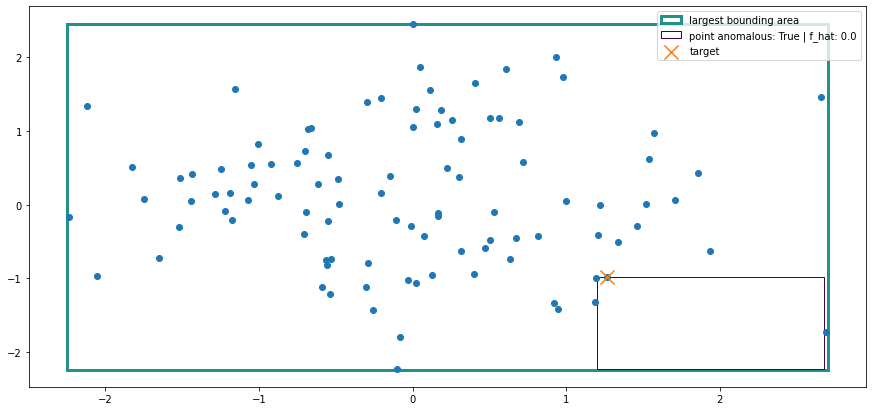

---------------------------------------------------------------------------------------------
              Mixed-Integer Nonlinear Decomposition Toolbox in Pyomo (MindtPy)               
---------------------------------------------------------------------------------------------
For more information, please visit https://pyomo.readthedocs.io/en/stable/contributed_packages/mindtpy.html
Original model has 911 constraints (1 nonlinear) and 0 disjunctions, with 506 variables, of which 500 are binary, 0 are integer, and 6 are continuous.
Objective is nonlinear. Moving it to constraint set.


------- itr: 3 -------
cutoff (min_area):  63.0
point:  [-0.20558877  0.16041243]
training set:  [[-2.14357230e-04  2.43969751e+00]
 [-1.07217896e+00  5.90202754e-02]
 [ 1.26731972e+00 -9.83971432e-01]
 [-2.05588770e-01  1.60412428e-01]
 [-1.24921945e+00  4.79876684e-01]
 [ 1.70761163e+00  5.94860195e-02]
 [ 6.93447583e-01  1.11773628e+00]
 [-1.46292547e-01  3.90388890e-01]
 [ 9.99426320e-01  4.19635901e-02]
 [-1.29003178e+00  1.45090959e-01]
 [-2.97085602e-01  1.39393435e+00]
 [ 1.21913304e+00 -5.93983436e-03]
 [ 4.69964711e-01 -5.82007038e-01]
 [ 1.62825446e-01 -1.16574777e-01]
 [-1.43436589e+00  4.12339454e-01]
 [-6.16657584e-01  2.76254102e-01]
 [ 8.14641191e-01 -4.25425350e-01]
 [ 9.18796046e-01 -1.33151723e+00]
 [ 1.52010636e+00  1.06691479e-02]
 [-1.17347869e+00 -2.13829776e-01]
 [ 7.20887869e-01  5.79039092e-01]
 [ 9.31463007e-01  1.99193265e+00]
 [ 2.56797363e-01  1.14246516e+00]
 [-5.51999558e-01 -2.20166419e-01]
 [ 9.47354313e-01 -1.41172492e+00]
 [ 7.60430129e-02 -4.3112281

rNLP is the initial strategy being used.

 Iteration | Subproblem Type | Objective Value | Primal Bound |   Dual Bound |   Gap   | Time(s)

         -       Relaxed NLP       1.95994e-07            inf    1.95994e-07      nan%      0.44
         1              MILP       3.36318e-07            inf    3.36318e-07      nan%      0.59
NLP subproblem was locally infeasible.
Solving feasibility problem
         2              MILP       1.95718e-07            inf    3.36318e-07      nan%      1.31
NLP subproblem was locally infeasible.
Solving feasibility problem
         3              MILP       3.37883e-07            inf    3.37883e-07      nan%      2.20
NLP subproblem was locally infeasible.
Solving feasibility problem
         4              MILP           537.498            inf        537.498      nan%      3.44
NLP subproblem was locally infeasible.
Solving feasibility problem
         5              MILP           537.498            inf        537.498      nan%      4.56
*        5

evaluating: [-0.20558877  0.16041243] -> f_hat:2.799159957512209 <?> mu:0.1
Classification result:  False
area_calculated_pattern:  1.0717501127253513


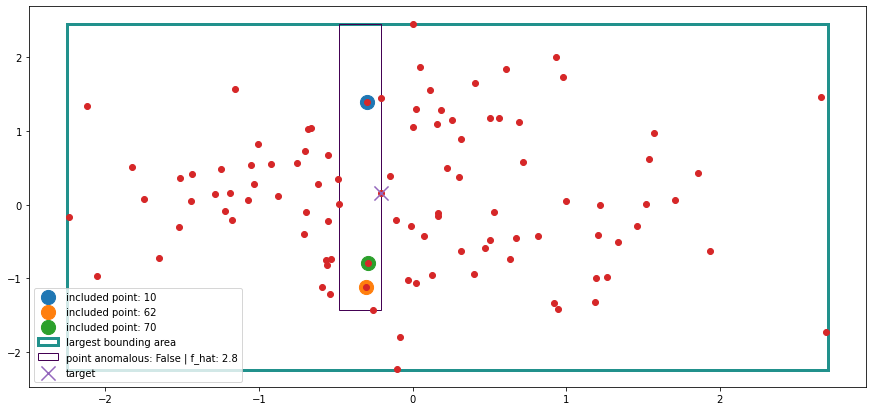

---------------------------------------------------------------------------------------------
              Mixed-Integer Nonlinear Decomposition Toolbox in Pyomo (MindtPy)               
---------------------------------------------------------------------------------------------
For more information, please visit https://pyomo.readthedocs.io/en/stable/contributed_packages/mindtpy.html
Original model has 911 constraints (1 nonlinear) and 0 disjunctions, with 506 variables, of which 500 are binary, 0 are integer, and 6 are continuous.
Objective is nonlinear. Moving it to constraint set.
rNLP is the initial strategy being used.

 Iteration | Subproblem Type | Objective Value | Primal Bound |   Dual Bound |   Gap   | Time(s)



------- itr: 4 -------
cutoff (min_area):  63.0
point:  [-1.24921945  0.47987668]
training set:  [[-2.14357230e-04  2.43969751e+00]
 [-1.07217896e+00  5.90202754e-02]
 [ 1.26731972e+00 -9.83971432e-01]
 [-2.05588770e-01  1.60412428e-01]
 [-1.24921945e+00  4.79876684e-01]
 [ 1.70761163e+00  5.94860195e-02]
 [ 6.93447583e-01  1.11773628e+00]
 [-1.46292547e-01  3.90388890e-01]
 [ 9.99426320e-01  4.19635901e-02]
 [-1.29003178e+00  1.45090959e-01]
 [-2.97085602e-01  1.39393435e+00]
 [ 1.21913304e+00 -5.93983436e-03]
 [ 4.69964711e-01 -5.82007038e-01]
 [ 1.62825446e-01 -1.16574777e-01]
 [-1.43436589e+00  4.12339454e-01]
 [-6.16657584e-01  2.76254102e-01]
 [ 8.14641191e-01 -4.25425350e-01]
 [ 9.18796046e-01 -1.33151723e+00]
 [ 1.52010636e+00  1.06691479e-02]
 [-1.17347869e+00 -2.13829776e-01]
 [ 7.20887869e-01  5.79039092e-01]
 [ 9.31463007e-01  1.99193265e+00]
 [ 2.56797363e-01  1.14246516e+00]
 [-5.51999558e-01 -2.20166419e-01]
 [ 9.47354313e-01 -1.41172492e+00]
 [ 7.60430129e-02 -4.3112281

         -       Relaxed NLP       1.95914e-07            inf    1.95914e-07      nan%      0.38
         1              MILP       1.98293e-07            inf    1.98293e-07      nan%      0.47
NLP subproblem was locally infeasible.
Solving feasibility problem
         2              MILP       1.97852e-07            inf    1.98293e-07      nan%      1.18
NLP subproblem was locally infeasible.
Solving feasibility problem
         3              MILP       2.89977e-07            inf    2.89977e-07      nan%      1.90
*        3         Fixed NLP       -7.4941e-09    -7.4941e-09    2.89977e-07   -3917.14%      2.15
MindtPy exiting on bound convergence. Absolute gap: -2.97471455749239e-07 <= absolute tolerance: 0.0001 

 Primal integral          :    0.0000 
 Dual integral            :    0.0000 
 Primal-dual gap integral :    0.0000 


evaluating: [-1.24921945  0.47987668] -> f_hat:0.0 <?> mu:0.1
Classification result:  True
area_calculated_pattern:  1.1517710522958766


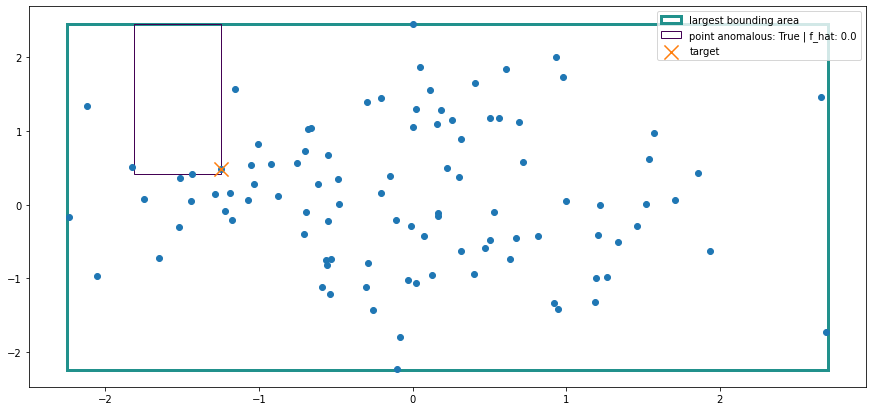

------- itr: 5 -------
cutoff (min_area):  63.0


---------------------------------------------------------------------------------------------
              Mixed-Integer Nonlinear Decomposition Toolbox in Pyomo (MindtPy)               
---------------------------------------------------------------------------------------------
For more information, please visit https://pyomo.readthedocs.io/en/stable/contributed_packages/mindtpy.html
Original model has 911 constraints (1 nonlinear) and 0 disjunctions, with 506 variables, of which 500 are binary, 0 are integer, and 6 are continuous.
Objective is nonlinear. Moving it to constraint set.


point:  [1.70761163 0.05948602]
training set:  [[-2.14357230e-04  2.43969751e+00]
 [-1.07217896e+00  5.90202754e-02]
 [ 1.26731972e+00 -9.83971432e-01]
 [-2.05588770e-01  1.60412428e-01]
 [-1.24921945e+00  4.79876684e-01]
 [ 1.70761163e+00  5.94860195e-02]
 [ 6.93447583e-01  1.11773628e+00]
 [-1.46292547e-01  3.90388890e-01]
 [ 9.99426320e-01  4.19635901e-02]
 [-1.29003178e+00  1.45090959e-01]
 [-2.97085602e-01  1.39393435e+00]
 [ 1.21913304e+00 -5.93983436e-03]
 [ 4.69964711e-01 -5.82007038e-01]
 [ 1.62825446e-01 -1.16574777e-01]
 [-1.43436589e+00  4.12339454e-01]
 [-6.16657584e-01  2.76254102e-01]
 [ 8.14641191e-01 -4.25425350e-01]
 [ 9.18796046e-01 -1.33151723e+00]
 [ 1.52010636e+00  1.06691479e-02]
 [-1.17347869e+00 -2.13829776e-01]
 [ 7.20887869e-01  5.79039092e-01]
 [ 9.31463007e-01  1.99193265e+00]
 [ 2.56797363e-01  1.14246516e+00]
 [-5.51999558e-01 -2.20166419e-01]
 [ 9.47354313e-01 -1.41172492e+00]
 [ 7.60430129e-02 -4.31122819e-01]
 [-1.03483776e+00  2.76807292e-01]
 [-2.119

rNLP is the initial strategy being used.

 Iteration | Subproblem Type | Objective Value | Primal Bound |   Dual Bound |   Gap   | Time(s)

         -       Relaxed NLP       1.89956e-07            inf    1.89956e-07      nan%      0.42
         1              MILP       2.30058e-07            inf    2.30058e-07      nan%      0.55
NLP subproblem was locally infeasible.
Solving feasibility problem
         2              MILP       2.79907e-07            inf    2.79907e-07      nan%      1.39
NLP subproblem was locally infeasible.
Solving feasibility problem
         3              MILP       1.91559e-07            inf    2.79907e-07      nan%      2.25
NLP subproblem was locally infeasible.
Solving feasibility problem
         4              MILP       3.15825e-07            inf    3.15825e-07      nan%      3.12
NLP subproblem was locally infeasible.
Solving feasibility problem
         5              MILP           47.2422            inf        47.2422      nan%      4.46
*        5

evaluating: [1.70761163 0.05948602] -> f_hat:0.4902405202794888 <?> mu:0.1
Classification result:  False
area_calculated_pattern:  2.0398150675711073


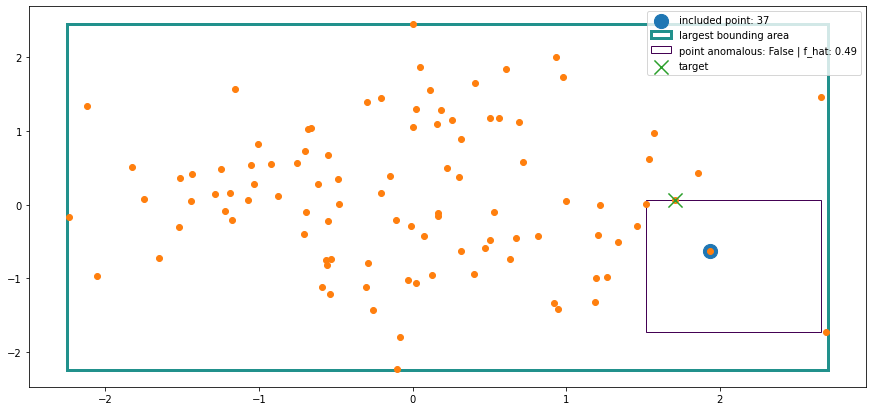

---------------------------------------------------------------------------------------------
              Mixed-Integer Nonlinear Decomposition Toolbox in Pyomo (MindtPy)               
---------------------------------------------------------------------------------------------
For more information, please visit https://pyomo.readthedocs.io/en/stable/contributed_packages/mindtpy.html
Original model has 911 constraints (1 nonlinear) and 0 disjunctions, with 506 variables, of which 500 are binary, 0 are integer, and 6 are continuous.
Objective is nonlinear. Moving it to constraint set.
rNLP is the initial strategy being used.

 Iteration | Subproblem Type | Objective Value | Primal Bound |   Dual Bound |   Gap   | Time(s)



------- itr: 6 -------
cutoff (min_area):  63.0
point:  [0.69344758 1.11773628]
training set:  [[-2.14357230e-04  2.43969751e+00]
 [-1.07217896e+00  5.90202754e-02]
 [ 1.26731972e+00 -9.83971432e-01]
 [-2.05588770e-01  1.60412428e-01]
 [-1.24921945e+00  4.79876684e-01]
 [ 1.70761163e+00  5.94860195e-02]
 [ 6.93447583e-01  1.11773628e+00]
 [-1.46292547e-01  3.90388890e-01]
 [ 9.99426320e-01  4.19635901e-02]
 [-1.29003178e+00  1.45090959e-01]
 [-2.97085602e-01  1.39393435e+00]
 [ 1.21913304e+00 -5.93983436e-03]
 [ 4.69964711e-01 -5.82007038e-01]
 [ 1.62825446e-01 -1.16574777e-01]
 [-1.43436589e+00  4.12339454e-01]
 [-6.16657584e-01  2.76254102e-01]
 [ 8.14641191e-01 -4.25425350e-01]
 [ 9.18796046e-01 -1.33151723e+00]
 [ 1.52010636e+00  1.06691479e-02]
 [-1.17347869e+00 -2.13829776e-01]
 [ 7.20887869e-01  5.79039092e-01]
 [ 9.31463007e-01  1.99193265e+00]
 [ 2.56797363e-01  1.14246516e+00]
 [-5.51999558e-01 -2.20166419e-01]
 [ 9.47354313e-01 -1.41172492e+00]
 [ 7.60430129e-02 -4.31122819e

         -       Relaxed NLP       1.95302e-07            inf    1.95302e-07      nan%      0.38
         1              MILP       2.68622e-07            inf    2.68622e-07      nan%      0.49
NLP subproblem was locally infeasible.
Solving feasibility problem
         2              MILP       1.97884e-07            inf    2.68622e-07      nan%      1.35
NLP subproblem was locally infeasible.
Solving feasibility problem
         3              MILP       3.32166e-07            inf    3.32166e-07      nan%      2.18
NLP subproblem was locally infeasible.
Solving feasibility problem


In [7]:
points_outside_of_largest_bounding_area = 0
indeces = []
predictions = []

mu, epsilon, delta = 0.1, 0.1, 0.1
N, d = training_set.shape
v = 2 * d 
min_area = 63.0 # MIN_AREA 
print("min_area: ", min_area)
print(f"N={N} , d={d}, vc={v}")

lba = np.zeros((d,2), dtype=float)
for i in np.arange(0,d,1):
    lba[i] = np.array(
        [
            np.min(training_set[:, i]) - 1e-2, 
            np.max(training_set[:, i]) + 1e-2
        ]
    )

for i, point_to_be_classified in enumerate(training_set): # testing_set
    print(f"------- itr: {i} -------")
    
    minlp_model, classification_result = minlp_has_rare_pattern(
        point_to_be_classified,
        training_set,
        PatternSpace(
            type = PatternSpaceType.AXIS_ALIGNED_HYPER_RECTANGLES, 
            cutoff = min_area if min_area != None else 0.1
        ),
        mu,
        debugging_minlp_model=True,
    )
    
    print("Classification result: ",classification_result)
    predictions.append(classification_result)
    
    ax = plt.gca()
    if minlp_model is not None:
        result = (
            mu,
            classification_result,
            minlp_model
        )
        included_points = minlp_model.extract_points_included_in_pattern()
        calculated_pattern = minlp_model.extract_pattern()
        area_calculated_pattern = np.prod(np.apply_along_axis(lambda i: i[1] - i[0], axis=1, arr=calculated_pattern))
        print("area_calculated_pattern: ", area_calculated_pattern)
        # assert area_calculated_pattern is not None, "area of minimized pattern is None"
        # assert area_calculated_pattern >= 0, "area of minimized pattern is negative"
        largest_bounding_area = minlp_model.largest_bounding_area
        [plt.scatter(
            x=p[0], 
            y=p[1], 
            marker="o", 
            s=200, 
            label=f"included point: {np.argwhere(training_set == p)[0,0]}") for _, p in enumerate(included_points)
        ]
        plt.legend([f"area of calculated pattern: {area_calculated_pattern}"])
        draw_largest_bounding_area(largest_bounding_area, ax)
        draw2dpattern(calculated_pattern, ax, classification_result, minlp_model.minimized_f_hats, len(training_set))
        plt.legend(bbox_to_anchor=(1.1, 1.1))
    else:
        print(f"---> !! minlp model is none and classification results: {classification_result} !! ")
        draw_largest_bounding_area(lba, ax)
        ax.legend()
        points_outside_of_largest_bounding_area += 1 
        indeces.append(i)

    plt.scatter(x=training_set[:,0], y=training_set[:,1])
    plt.scatter(
        x=point_to_be_classified[0], 
        y=point_to_be_classified[1], 
        marker="x",  
        s=200, 
        label="target") 
    plt.legend()
    plt.show()

print("-- END __")
print("Points that lie outside of the largest bounding area defined by the training set: ",points_outside_of_largest_bounding_area) 
print("indices of the points: ", indeces)

# Testing RarePatternDetect class

In [ ]:
# # print(training_set)

# rpd = RarePatternDetect(
#     delta=0.01,
#     tau=0.01,
#     epsilon=0.01,
#     pattern_space = PatternSpace(
#         PatternSpaceType.AXIS_ALIGNED_HYPER_RECTANGLES, 
#         cutoff = 0.41 # 3 #min_area
#     )
# )
# rpd.load_training_data(training_set)
# preds = [rpd.is_anomalous(point_to_be_classified) for _, point_to_be_classified in enumerate(testing_set)]
# print(preds)

# print(predictions)
# # -> should get the same results
# assert preds == predictions
# # ssert preds in np.array([True, False]) and no "None"
# assert None not in preds 
# assert None not in predictions

# Experiment: Prediction using Isolation Forest and comparison with the minlp solver

In [2]:
# from sklearn.ensemble import IsolationForest

# clf = IsolationForest(random_state=0).fit(X)
# r = clf.predict(X) # -1 anomalie
# r = np.where(r==1, r, False).astype(bool)
# # print("r: ",r)

# count_similar_predictions = np.count_nonzero(r == preds)
# per_similar_predictions = count_similar_predictions/len(X)
# count_similar_predictions,  per_similar_predictions


# Testing the solver on more than two features

In [ ]:
# with np.load('../ADbench-main/datasets/Classical/6_cardio.npz') as data:
#     X = data['X']
#     y = data['y']

# TRAINING_LIMIT = 200
# TESTING_LIMIT = 10
# FEATURES = 2

# X = X[:,:FEATURES]

# training_set = X[:TRAINING_LIMIT]
# training_labels = y[:TRAINING_LIMIT]

# # slicing
# testing_set = X[TRAINING_LIMIT:-1:300]
# testing_labels = y[TRAINING_LIMIT:-1:300]

# rpd = RarePatternDetect(
#     delta=0.1,
#     tau=0.1,
#     epsilon=0.1,
#     pattern_space = PatternSpace(
#         PatternSpaceType.AXIS_ALIGNED_HYPER_RECTANGLES, 
#         cutoff = 0.1
#     )
# )

# # print("testing_set: ", testing_set)
# rpd.fit(training_set)

# preds = [rpd.predict_score(point_to_be_classified) for _, point_to_be_classified in enumerate(testing_set)]

# print("--- RESULTS ---")
# print("predictions: ", preds)

# Evaluating the performance (AUROC) on 300 points with 3 features

In [ ]:
# # Loading the data
# with np.load('../ADBench-main/datasets/Classical/6_cardio.npz') as data:
#     X = data['X']
#     y = data['y']
#     idx = np.random.permutation(len(X))
#     X,y = X[idx], y[idx]

# TRAINING_LIMIT = 300
# FEATURES = 3
# X = X[:TRAINING_LIMIT,:FEATURES]
# y = y[:TRAINING_LIMIT]

In [ ]:
# # creating a range of taus
# taus = [0.1] # np.linspace(start=0.1,stop=1.0,num=5)

# # Creating a range of min areas
# # min_areas = np.linspace(start=0.1,stop=40.0,num=4)

# predictions_list = []
# print(f"num datapoints: {len(y)}")

# # for i, ma in enumerate(min_areas):
#     # print(f"––– ––– ––– new round: i={i}, min_area:{ma}  ––– ––– –––")
# for i, tau in enumerate(taus):
#     print(f"––– ––– ––– new round: i={i}, tau:{tau}  ––– ––– –––")
#     rpd = RarePatternDetect(
#         delta=0.1,
#         tau=tau,
#         epsilon=0.1,
#         pattern_space = PatternSpace(
#             PatternSpaceType.AXIS_ALIGNED_HYPER_RECTANGLES, 
#             cutoff = 30.0914 # 63.0 for 100 points # 48.8 for 200
#         )
#     )

#     rpd.fit(X)
#     preds = []
#     for _, point_to_be_classified in enumerate(X):
#         preds.append(rpd.predict_score(point_to_be_classified))

#     print(f" --> RESULTS for tau: {tau} ---")
#     # print(f" --> RESULTS for min_area: {ma} ---")
#     # print("predictions: ", preds)
#     # print("labels: ", y)
#     # print("r: ",r)
#     predictions_list.append(preds)
#     preds = np.where(preds==1, preds, False).astype(bool)
#     count_similar_predictions = np.count_nonzero(y == preds)
#     per_similar_predictions = count_similar_predictions/len(y)
#     print(f" similar results: {count_similar_predictions},  percentage: {per_similar_predictions}")

In [ ]:
# from sklearn import metrics
# print(p)
# for _, p in enumerate(predictions_list):
#     auc = metrics.roc_auc_score(y, p)

#     # Recall that a model with an AUC score of 0.5 is no better than a model that performs random guessing.
#     print("auroc: ",auc)

#     fpr, tpr, _ = metrics.roc_curve(y, p)
    
#     #create ROC curve
#     plt.plot(fpr,tpr)
#     print(fpr,tpr)
# plt.ylabel('True Positive Rate')
# plt.xlabel('False Positive Rate')
# plt.show()

# Evaluating the performance on 100 points with two features and scaling tau 

In [ ]:
# # Loading the data
# with np.load('../ADBench-main/datasets/Classical/6_cardio.npz') as data:
#     X = data['X']
#     y = data['y']
#     idx = np.random.permutation(len(X))
#     X,y = X[idx], y[idx]

# TRAINING_LIMIT = 100
# FEATURES = 2
# X = X[:TRAINING_LIMIT,:FEATURES]
# y = y[:TRAINING_LIMIT]

# # creating a range of taus
# taus = np.linspace(start=0.1,stop=1.0,num=5)

# # Creating a range of min areas
# # min_areas = np.linspace(start=0.1,stop=40.0,num=4)

# predictions_list = []
# print(f"num datapoints: {len(y)}")

# # for i, ma in enumerate(min_areas):
#     # print(f"––– ––– ––– new round: i={i}, min_area:{ma}  ––– ––– –––")
# for i, tau in enumerate(taus):
#     print(f"––– ––– ––– new round: i={i}, tau:{tau}  ––– ––– –––")
#     rpd = RarePatternDetect(
#         delta=0.1,
#         tau=tau,
#         epsilon=0.1,
#         pattern_space = PatternSpace(
#             PatternSpaceType.AXIS_ALIGNED_HYPER_RECTANGLES, 
#             cutoff = 30.0914 # 63.0 for 100 points # 48.8 for 200
#         )
#     )

#     rpd.fit(X)
#     preds = []
#     for _, point_to_be_classified in enumerate(X):
#         preds.append(rpd.predict_score(point_to_be_classified))

#     print(f" --> RESULTS for tau: {tau} ---")
#     predictions_list.append(preds)
#     preds = np.where(preds==1, preds, False).astype(bool)
#     count_similar_predictions = np.count_nonzero(y == preds)
#     per_similar_predictions = count_similar_predictions/len(y)
#     print(f" similar results: {count_similar_predictions},  percentage: {per_similar_predictions}")

In [ ]:
# for i, (p,tau) in enumerate(zip(predictions_list,taus)):
#     # TODO: make sure this is correct 
#     auc = metrics.roc_auc_score(y, p)

#     # Recall that a model with an AUC score of 0.5 is no better than a model that performs random guessing.
#     print("auroc: ",auc)

#     fpr, tpr, _ = metrics.roc_curve(y, p)
    
#     #create ROC curve
#     plt.scatter(fpr,tpr, label=f"{tau}")
#     plt.legend(loc="upper left")
#     print(fpr,tpr)

# plt.ylabel('True Positive Rate')
# plt.xlabel('False Positive Rate')
# plt.show()